# 1. Problem Statement

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

<b>File and Data Field Descriptions</b>

<b>train.csv</b> - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

<b>PassengerId</b> - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

<b>HomePlane</b>t - The planet the passenger departed from, typically their planet of permanent residence.

<b>CryoSleep</b> - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

<b>Cabin</b> - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

<b>Destination</b> - The planet the passenger will be debarking to.

<b>Age</b> - The age of the passenger.

<b>VIP</b> - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

<b>Name</b> - The first and last names of the passenger.

<b>Transported</b> - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

<b>test.csv</b> - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

<b>sample_submission.csv</b> - A submission file in the correct format.

<b>PassengerId</b> - Id for each passenger in the test set.

<b>Transported</b> - The target. For each passenger, predict either True or False.

# 2. Importing Dataset and Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df_train=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
df_test=pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [4]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
#df_train=df_train.drop(['PassengerId','Name'],axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


# 3. Data Cleaning and preprocessing

In [8]:
#Checking for missing values in each column of the training dataset
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<Figure size 720x432 with 0 Axes>

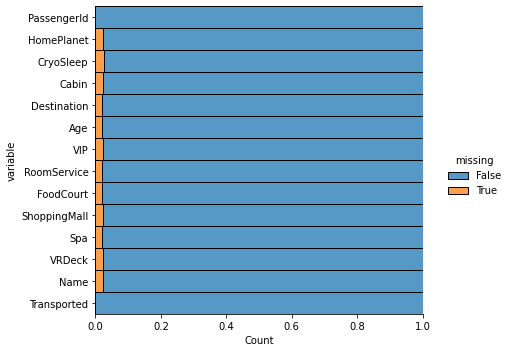

In [9]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df_train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [10]:
#Split df_train and df_test columns into numerical and categorical 
num_features=[col for col in df_train.select_dtypes('number')]
categ_features=[col for col in df_train.select_dtypes(exclude=['number'])]
test_categ_features=[col for col in df_test.select_dtypes(exclude=['number'])]

#replace missing values in each numerical column with the mediane
for col in num_features:
    df_train[col].fillna(df_train[col].mean(), inplace=True)
    df_test[col].fillna(df_test[col].mean(), inplace=True)
    
#replace missing values in each categorical column with the most frequent value
for col in categ_features:
    df_train[col].fillna(df_train[col].value_counts().index[0], inplace=True)
for col in test_categ_features:
    df_test[col].fillna(df_test[col].value_counts().index[0], inplace=True)   

In [11]:
df_train.isna().sum()


PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [12]:
#Checking for missing values in df_test after imputation
df_test.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [13]:
for col in categ_features:
    print("{0}  :  {1} ".format(col, len(df_train[col].unique())))

PassengerId  :  8693 
HomePlanet  :  3 
CryoSleep  :  2 
Cabin  :  6560 
Destination  :  3 
VIP  :  2 
Name  :  8473 
Transported  :  2 


In [14]:
#Creating new features for training dataset and test dataset

#Cabin has three values deck/num/side, so we'll create two columns for deck and side
df_train["Deck"] = df_train["Cabin"].apply(lambda x: str(x).split("/")[0])
df_test["Deck"] = df_test["Cabin"].apply(lambda x: str(x).split("/")[0])
df_train["side"] =df_train["Cabin"].apply(lambda x: x.split("/")[2])
df_test["side"] = df_test["Cabin"].apply(lambda x: x.split("/")[2])

#Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group, so we'll create two new features GroupId and GroupIdNumber
df_train["GroupId"] = df_train["PassengerId"].apply(lambda x: x.split("_")[0])
df_test["GroupId"] = df_test["PassengerId"].apply(lambda x: x.split("_")[0])
df_train["GroupIdNumber"] =df_train["PassengerId"].apply(lambda x: x.split("_")[1])
df_test["GroupIdNumber"] = df_test["PassengerId"].apply(lambda x: x.split("_")[1])

# Creating new feature InGroup to indicate if a passenger is alone or in group
Group_train =df_train[df_train["GroupId"].duplicated()]["GroupId"]
Group_test =df_test[df_test["GroupId"].duplicated()]["GroupId"]
df_train["InGroup"] = df_train["GroupId"].apply(lambda x: x in Group_train.values)
df_test["InGroup"] = df_test["GroupId"].apply(lambda x: x in Group_test.values)

In [15]:
#Drop 'PassengerId','Cabin','Name','GroupId','GroupIdNumber' from df_train
df_train.drop(['PassengerId','Cabin','Name','GroupId','GroupIdNumber'], axis=1, inplace=True)
#Save PassengerId and Name
Id_test_list = df_test["PassengerId"].tolist()
#Drop 'PassengerId','Cabin','Name','GroupId','GroupIdNumber' from df_test
df_test.drop(['PassengerId','Cabin','Name','GroupId','GroupIdNumber'], axis=1, inplace=True)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8693 non-null   object 
 12  side          8693 non-null   object 
 13  InGroup       8693 non-null   bool   
dtypes: bool(4), float64(6), object(4)
memory usage: 713.2+ KB


In [17]:
#print categories of each categorical column after removing unnecessary columns
for col in df_train.select_dtypes(exclude=['number']):
    print(f'{col} : {df_train[col].unique()} : {len(df_train[col].unique())}')

HomePlanet : ['Europa' 'Earth' 'Mars'] : 3
CryoSleep : [False  True] : 2
Destination : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e'] : 3
VIP : [False  True] : 2
Transported : [False  True] : 2
Deck : ['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T'] : 8
side : ['P' 'S'] : 2
InGroup : [False  True] : 2


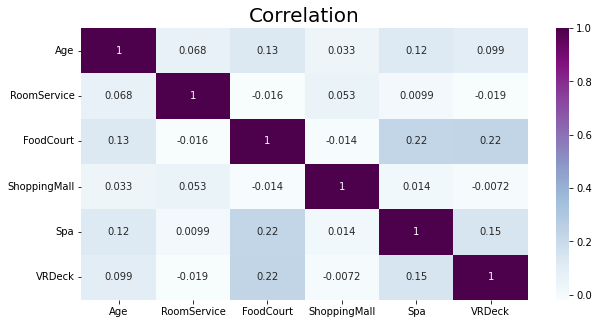

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(df_train.select_dtypes('number').corr(),cmap='BuPu',annot=True)
plt.title ('Correlation', fontsize=20)
plt.show()

In [19]:
df=df_train.copy()


In [20]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,side,InGroup
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S,False
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S,True
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S,True
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,P,False
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,S,False
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,S,False
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,S,True


# 4. Split Dataset into Training and Testing Set

In [21]:
X= pd.get_dummies(df.drop(['Transported'],axis=1),drop_first=True)
y= df['Transported']
df_test=pd.get_dummies(df_test,drop_first=True)


from sklearn.model_selection import train_test_split
from sklearn import preprocessing


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
df_test = pd.DataFrame(scaler.transform(df_test), columns = df_test.columns)

# 5. Machine Learning Model Pipeline

In [23]:
from warnings import filterwarnings
filterwarnings(action='ignore', category=DeprecationWarning)
# machine learning model_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


model_pipeline=[]
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GradientBoostingClassifier())
model_pipeline.append(AdaBoostClassifier())
model_pipeline.append(XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',learning_rate=0.05, max_depth=5, n_estimators=180))

In [24]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#model_list=['Logistic Regression','SVM','KNN','Decision Tree','Random Forest','Naive Bayes','AdaBoost']
model_list=['Logistic Regression','KNN','Decision Tree','Random Forest','GradientBoost','AdaBoost','XGB']
acc_list=[]
auc_list=[]
cm_list=[]

for model in model_pipeline:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test,y_pred))
    fpr,tpr,_thresholds=metrics.roc_curve(y_test,y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(confusion_matrix(y_test,y_pred))
    
result_df=pd.DataFrame({'Model':model_list,'Accuracy':acc_list,'AUC':auc_list})
result_df.sort_values('Accuracy',ascending=False)

,Model,Accuracy,AUC
6,XGB,0.789534,0.79
4,GradientBoost,0.788384,0.79
5,AdaBoost,0.786371,0.79
0,Logistic Regression,0.784934,0.78
3,Random Forest,0.784646,0.78
1,KNN,0.767395,0.77
2,Decision Tree,0.730017,0.73


%%time

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

my_model=model_pipeline[6]
params = {
 'max_depth': range (2, 10, 1),
 'n_estimators': range(60, 220, 40),
 'learning_rate': [0.01, 0.10, 0.05]
}

grid_search = GridSearchCV(estimator=my_model,
                           param_grid=params,                          
                           n_jobs=10,
                           cv=10,
                           verbose=True)
grid_search.fit(X_train,y_train)

predictions_1 = grid_search.predict(X_test)

score_1 = grid_search.score(X_test, y_test)
mae_1 = mean_squared_error(y_test, predictions_1)
rmse_1 = np.sqrt(mae_1)

print('Model Accuracy : ', score_1)
print('Mean Squared Error : ', mae_1)
print('RMSE : ', rmse_1)

print(grid_search.best_params_)

In [25]:
#pred=pd.Series(model_pipeline[0].predict(df_test))
pred=pd.Series(model_pipeline[6].predict(df_test)).map({0:False, 1:True})
#pred=pd.Series(grid_search.predict(df_test)).map({0:False, 1:True})
submission = pd.DataFrame({'PassengerId': Id_test_list,
                       'Transported': pred})

submission.to_csv("submission.csv", index=False)
submission.Transported.value_counts()

True     2199
False    2078
Name: Transported, dtype: int64